In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.3 MB/s 
     |████████████████████████████████| 5.5 MB 62.7 MB/s 
     |████████████████████████████████| 1.3 MB 48.6 MB/s 
     |████████████████████████████████| 182 kB 71.3 MB/s 
     |████████████████████████████████| 7.6 MB 62.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=4905295de8597560807e11942ee23c4511ac5b326c389be886b78d4fdd17ad6d
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
import nltk
import numpy as np
import cv2
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import tensorflow
from keras.layers import Input
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from tqdm import tqdm
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import sklearn.metrics
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torch.utils.data as Data
import cv2
import os
import csv
import numpy as np
from tqdm import tqdm
from sentence_transformers import SentenceTransformer,util

In [ ]:
from PIL import Image

In [ ]:
text_model = SentenceTransformer('clip-ViT-B-32-multilingual-v1')
image_model = SentenceTransformer('clip-ViT-B-32')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/115 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.57M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/371 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/605M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/604 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/961k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [ ]:
train_df= pd.read_csv('/content/drive/MyDrive/factify2.0_doc/train_final.csv',sep=",")

In [ ]:
train_df.head(2)

,Unnamed: 0,claim,claim_image,document,document_image,Category,Claim OCR,Document OCR,Text_Sim,Img_Sim,simcse,rouge,claim_length,document_length,Label,text_clip_label,num
0,0,#SoniaGandhi and @priyankagandhi pay tribute t...,http://pbs.twimg.com/media/D_-04amVAAAQ9QH.jpg...,Sheila Dikshit’s last journey began on Sunday....,http://pbs.twimg.com/media/D_-cMtuW4AAthus.jpg...,Support_Multimodal,ANI,ANI,0.522159,0.700236,0.781095,0.480000,236,6354,0,0,0
1,1,West Bengal: Preparations underway at a pollin...,http://pbs.twimg.com/media/ExclUmaUYAETA5E.jpg...,Polling for phase 1 of the assembly elections ...,http://pbs.twimg.com/media/ExdUiyjVIAAM6vE.jpg...,Support_Multimodal,পোলিং অফিসারস\nANI,RKS,0.689106,0.653513,0.597717,0.642857,212,11638,0,0,0


In [ ]:
train_df.shape

(34986, 17)

In [ ]:
val_df= pd.read_csv('/content/drive/MyDrive/factify2.0_doc/val_final.csv',sep=",")

In [ ]:
test_df= pd.read_csv("/content/drive/MyDrive/factify2.0_doc/resnet+sbert+rouge+length/test_renet.csv",sep=",")

In [ ]:
val_df.head(2)

,Unnamed: 0,claim,claim_image,document,document_image,Category,Claim OCR,Document OCR,Text_Sim,Img_Sim,simcse,rouge,claim_length,document_length,Label,text_clip_label,num
0,0,Total number of #COVID19 positive cases in Ind...,http://pbs.twimg.com/media/EXTnmuGU0AES052.jpg...,"\nSep 05, 2021-Sunday\n \n\nMetro cities - De...",http://pbs.twimg.com/media/EXVWJBXU4AI3J9o.jpg...,Support_Multimodal,THE VIRUS THREAT IN INDIA\n49391\nTotal number...,HEALTH\ndıcılıcılı\nONAL\nराष्ट्रीय स्वास्थ्य ...,0.337434,0.604948,0.225663,0.555556,247,5814,0,1,0
1,1,#Coronavirus outbreak: Delhi government to ban...,http://pbs.twimg.com/media/ES-JNGpU4AASLRy.jpg...,The Delhi government on Friday announced a few...,http://pbs.twimg.com/media/ES-GwWGU8AEm-8Q.jpg...,Support_Multimodal,OV\nb\nTEN\nCT\nANI,ANI\nCOV\nΤΕΝ\nPURUSSA\nC.T\nANI,0.706375,0.851710,0.844029,0.400000,167,2188,0,1,0


In [ ]:
val_df.head(2)

,Unnamed: 0,claim,claim_image,document,document_image,Category,Claim OCR,Document OCR,Text_Sim,Img_Sim,simcse,rouge,claim_length,document_length,Label,text_clip_label,num
0,0,Total number of #COVID19 positive cases in Ind...,http://pbs.twimg.com/media/EXTnmuGU0AES052.jpg...,"\nSep 05, 2021-Sunday\n \n\nMetro cities - De...",http://pbs.twimg.com/media/EXVWJBXU4AI3J9o.jpg...,Support_Multimodal,THE VIRUS THREAT IN INDIA\n49391\nTotal number...,HEALTH\ndıcılıcılı\nONAL\nराष्ट्रीय स्वास्थ्य ...,0.337434,0.604948,0.225663,0.555556,247,5814,0,1,0
1,1,#Coronavirus outbreak: Delhi government to ban...,http://pbs.twimg.com/media/ES-JNGpU4AASLRy.jpg...,The Delhi government on Friday announced a few...,http://pbs.twimg.com/media/ES-GwWGU8AEm-8Q.jpg...,Support_Multimodal,OV\nb\nTEN\nCT\nANI,ANI\nCOV\nΤΕΝ\nPURUSSA\nC.T\nANI,0.706375,0.851710,0.844029,0.400000,167,2188,0,1,0


In [ ]:
test_df.head(1)

,Unnamed: 0,Unnamed: 0.1,claim,claim_image,document,document_image,Claim OCR,Document OCR,Text_Sim,Img_Sim
0,0,0,Delhi: Group of students protest outside offic...,http://pbs.twimg.com/media/EOJMHR4VUAALSeG.jpg...,Hundreds of Jamia Millia Islamia students prot...,http://pbs.twimg.com/media/EOJ4Q47UcAAq6wy.jpg...,ANI,NaN,0.712563,0.629404


In [ ]:
val_df=val_df.drop(["Unnamed: 0"],axis=1) #删除a列

In [ ]:
import shutil
# 把olddir拷贝一份newdir
shutil.copytree("/content/drive/MyDrive/factify2.0_doc/factify2_image（里面是用URL爬的图）/image/document", '/content/train_doc/')

'/content/train_doc/'

In [ ]:
import shutil
# 把olddir拷贝一份newdir
shutil.copytree('/content/drive/MyDrive/factify2.0_doc/factify2_image（里面是用URL爬的图）/val/document', '/content/val_doc/')

In [ ]:
em1 = text_model.encode(list(train_df['claim']))
#em2 = text_model.encode(list(test_df['document']))
#em3 = text_model.encode(list(val_df['claim']))
#em4 = text_model.encode(list(val_df['document']))
ps = PorterStemmer()
sw = list(stopwords.words('english'))
punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''

In [ ]:
image1 = []
#image2 = []
#text1 = []
#text2 = []
#text3 = []
#text4 = []
picturedir="/content/image/"  #图片路径
for i in tqdm(range(len(em1))):
        del_file1 = picturedir + train_df["Category"].values[i] + "/" + str(train_df.index.values[i]) + ".jpg"
        #del_file2 = picturedir+"/document/" + train_df["Category"].values[i] + "/" + str(train_df.index.values[i]) + ".jpg"
        img_PIL1 = Image.open(del_file1)
        #img_PIL2 = Image.open(del_file2)
        #vec1 = image_model.encode(img_PIL1)
        #vec2 = image_model.encode(img_PIL2)
        #text1.append(em1[i])
        #text2.append(em2[i])
        #image1.append(vec1)
        #image2.append(vec2)

100%|██████████| 34986/34986 [00:06<00:00, 5050.48it/s]


In [ ]:
import os
import io
import requests
from PIL import Image
import pandas as pd
import zipfile
import re

In [ ]:
for n, row in train_df[30781:].iterrows():
  print(str(n))
  headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
  row["claim_image"]=re.sub("'",'',row["claim_image"])
  response = requests.get(row["claim_image"], headers=headers)
  img = Image.open(io.BytesIO(response.content))
  img = img.convert('RGB')
  img.save('/content/image/' + row["Category"] + "/" + str(n) + ".jpg")

30781
30782
30783
30784
30785
30786
30787
30788


KeyboardInterrupt: ignored

In [ ]:
for n, row in train_df[30760:].iterrows():
  print(str(n))
  headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
  row["claim_image"]=re.sub("'",'',row["claim_image"])
  response = requests.get(row["claim_image"], headers=headers)
  img = Image.open(io.BytesIO(response.content))
  img = img.convert('RGB')
  img.save(image_directory + "/claim/" + row["Category"] + "/" + str(n) + ".jpg")
  
  row["document_image"]=re.sub("'",'',row["document_image"])
  response = requests.get(row["document_image"], headers=headers)
  img = Image.open(io.BytesIO(response.content))
  img = img.convert('RGB')
  img.save(image_directory + "/document/" + row["Category"] + "/" + str(n) + ".jpg")

In [ ]:
for i in tqdm(range(len(em3))):
        text3.append(em3[i])
        text4.append(em4[i])

In [ ]:
list1 = []
for i in range(len(text1)):
    new_value = np.hstack([text1[i], text2[i]])
    list1.append(new_value)

In [ ]:
list2 = []
for i in range(len(text3)):
    new_value = np.hstack([text3[i], text4[i]])
    list2.append(new_value)

In [ ]:
category = {
     'Support_Multimodal': 0,
     'Support_Text': 1,
     'Insufficient_Multimodal': 2,
     'Insufficient_Text': 3,
     'Refute': 4
 }
val_df['num'] = val_df['Category'].map(category)
train_df['num'] = train_df['Category'].map(category)

In [ ]:
label1 = []
for n, row in tqdm(train_df.iterrows(), total=train_df.shape[0]):
    label1.append(row['Label'])

100%|██████████| 34986/34986 [00:02<00:00, 12090.67it/s]


In [ ]:
label2 = []
for n, row in tqdm(val_df.iterrows(), total=val_df.shape[0]):
    label2.append(row['Label'])

100%|██████████| 7499/7499 [00:00<00:00, 22372.25it/s]


In [ ]:
print(len(list1))
#print(len(list2))

7500


In [ ]:
list1 = np.array(list1)
#label1 = np.array(label1)
#list2 = np.array(list2)
#label2 = np.array(label2)

In [ ]:
test = list1

In [ ]:
Xtrain = list1
Xtest = list2
Ytrain = label1
Ytest = label2

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split as TTS

In [ ]:
mlp = MLPClassifier(solver='sgd', activation='relu', alpha=1e-4, random_state=1,
                    max_iter=100, verbose=True, learning_rate_init=.1)
# 使用solver='sgd'，准确率为98%，且每次训练都会分batch，消耗更小的内存
# 训练模型
mlp.fit(Xtrain, Ytrain)
# 查看模型结果
print(mlp.score(Xtest, Ytest))

Iteration 1, loss = 0.59489041
Iteration 2, loss = 0.51898804
Iteration 3, loss = 0.50179480
Iteration 4, loss = 0.49784065
Iteration 5, loss = 0.48538324
Iteration 6, loss = 0.47938679
Iteration 7, loss = 0.47179041
Iteration 8, loss = 0.47137709
Iteration 9, loss = 0.46644540
Iteration 10, loss = 0.45856764
Iteration 11, loss = 0.45212778
Iteration 12, loss = 0.45038611
Iteration 13, loss = 0.44602175
Iteration 14, loss = 0.44234992
Iteration 15, loss = 0.43531080
Iteration 16, loss = 0.43458289
Iteration 17, loss = 0.43134038
Iteration 18, loss = 0.42759438
Iteration 19, loss = 0.42500423
Iteration 20, loss = 0.42240179
Iteration 21, loss = 0.41648981
Iteration 22, loss = 0.41522873
Iteration 23, loss = 0.41345694
Iteration 24, loss = 0.41132986
Iteration 25, loss = 0.40896694
Iteration 26, loss = 0.40945641
Iteration 27, loss = 0.40521773
Iteration 28, loss = 0.40287443
Iteration 29, loss = 0.39418312
Iteration 30, loss = 0.39679576
Iteration 31, loss = 0.39689686
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp, Xtrain, Ytrain, cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
from sklearn.metrics import f1_score
pred = mlp.predict(Xtest)
weighted_f1= f1_score(Ytest, pred, average='weighted')
print(weighted_f1)

NotFittedError: ignored

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlp_clf__tuned_parameters = {"hidden_layer_sizes": [(100,), (100, 30)],
                                 "solver": ['adam', 'sgd', 'lbfgs'],
                                 "max_iter": [20],
                                 "verbose": [True]
                                 }
mlp = MLPClassifier()
estimator = GridSearchCV(mlp, mlp_clf__tuned_parameters, n_jobs=6)

In [ ]:
estimator.fit(Xtrain, Ytrain)
print(estimator.get_params().keys())
print(estimator.best_params_)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Iteration 1, loss = 0.56936491
Iteration 2, loss = 0.49727123
Iteration 3, loss = 0.47718280
Iteration 4, loss = 0.46253298
Iteration 5, loss = 0.45194088
Iteration 6, loss = 0.44211656
Iteration 7, loss = 0.42993037
Iteration 8, loss = 0.42251886
Iteration 9, loss = 0.41235670
Iteration 10, loss = 0.40302696
Iteration 11, loss = 0.39201269
Iteration 12, loss = 0.38499432
Iteration 13, loss = 0.37252618
Iteration 14, loss = 0.36455327
Iteration 15, loss = 0.36041588
Iteration 16, loss = 0.34887158
Iteration 17, loss = 0.33937595
Iteration 18, loss = 0.33336277
Iteration 19, loss = 0.32430607
Iteration 20, loss = 0.31723608
dict_keys(['cv', 'error_score', 'estimator__activation', 'estimator__alpha', 'estimator__batch_size', 'estimator__beta_1', 'estimator__beta_2', 'estimator__early_stopping', 'estimator__epsilon', 'estimator__hidden_layer_sizes', 'estimator__learning_rate', 'estimator__learning_rate_init', 'estimator__max_fun', 'estimator__max_iter', 'estimator__momentum', 'estimator__

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
pred = estimator.predict(Xtrain)
from sklearn.metrics import f1_score
weighted_f1= f1_score(Ytrain, pred, average='weighted')
print(weighted_f1)

0.8448108022317808


In [ ]:
pred = estimator.predict(list1)

In [ ]:
pred

array([1, 1, 0, ..., 1, 1, 2])

In [ ]:
pred.shape

(7500,)

In [ ]:
Ytest

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
test_df['text_clip_label'] = pred

In [ ]:
val_df.head(2)

,claim,claim_image,document,document_image,Category,Claim OCR,Document OCR,Text_Sim,Img_Sim,simcse,rouge,claim_length,document_length,Label,text_clip_label
0,Total number of #COVID19 positive cases in Ind...,http://pbs.twimg.com/media/EXTnmuGU0AES052.jpg...,"\nSep 05, 2021-Sunday\n \n\nMetro cities - De...",http://pbs.twimg.com/media/EXVWJBXU4AI3J9o.jpg...,Support_Multimodal,THE VIRUS THREAT IN INDIA\n49391\nTotal number...,HEALTH\ndıcılıcılı\nONAL\nराष्ट्रीय स्वास्थ्य ...,0.337434,0.604948,0.225663,0.555556,247,5814,0,1
1,#Coronavirus outbreak: Delhi government to ban...,http://pbs.twimg.com/media/ES-JNGpU4AASLRy.jpg...,The Delhi government on Friday announced a few...,http://pbs.twimg.com/media/ES-GwWGU8AEm-8Q.jpg...,Support_Multimodal,OV\nb\nTEN\nCT\nANI,ANI\nCOV\nΤΕΝ\nPURUSSA\nC.T\nANI,0.706375,0.851710,0.844029,0.400000,167,2188,0,1


In [ ]:
train_df.head(2)

,claim,claim_image,document,document_image,Category,Claim OCR,Document OCR,Text_Sim,Img_Sim,simcse,rouge,claim_length,document_length,Label,text_clip_label
0,#SoniaGandhi and @priyankagandhi pay tribute t...,http://pbs.twimg.com/media/D_-04amVAAAQ9QH.jpg...,Sheila Dikshit’s last journey began on Sunday....,http://pbs.twimg.com/media/D_-cMtuW4AAthus.jpg...,Support_Multimodal,ANI,ANI,0.522159,0.700236,0.781095,0.480000,236,6354,0,0
1,West Bengal: Preparations underway at a pollin...,http://pbs.twimg.com/media/ExclUmaUYAETA5E.jpg...,Polling for phase 1 of the assembly elections ...,http://pbs.twimg.com/media/ExdUiyjVIAAM6vE.jpg...,Support_Multimodal,পোলিং অফিসারস\nANI,RKS,0.689106,0.653513,0.597717,0.642857,212,11638,0,0


In [ ]:
test_df.head(1)

,Unnamed: 0,Unnamed: 0.1,claim,claim_image,document,document_image,Claim OCR,Document OCR,Text_Sim,Img_Sim,text_clip_label
0,0,0,Delhi: Group of students protest outside offic...,http://pbs.twimg.com/media/EOJMHR4VUAALSeG.jpg...,Hundreds of Jamia Millia Islamia students prot...,http://pbs.twimg.com/media/EOJ4Q47UcAAq6wy.jpg...,ANI,NaN,0.712563,0.629404,1


In [ ]:
!pip install rouge
from rouge import Rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
rouge1=[]
for n, row in test_df.iterrows():
  i=int(n)
  rouge = Rouge()
  r=rouge.get_scores(test_df['document'][i],test_df['claim'][i])
  r1=r[0]["rouge-1"]['r']
  rouge1.append(r1)

In [ ]:
test_df["rouge"]=rouge1

In [ ]:
test_df['claim_length'] = test_df['claim'].str.len()
test_df['document_length'] = test_df['document'].str.len()

In [ ]:
X_train = train_df[['text_clip_label',"Text_Sim","Img_Sim","rouge","claim_length","document_length"]]
y_train = train_df["Category"]
X_test = val_df[['text_clip_label',"Text_Sim","Img_Sim","rouge","claim_length","document_length"]]
y_test = val_df["Category"]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
test = test_df[['text_clip_label',"Text_Sim","Img_Sim","rouge","claim_length","document_length"]]
test = sc.transform(test)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
predictions = neigh.predict(X_test)
score = f1_score(y_test, predictions, average='weighted')
print(score)

0.7486750439216342


In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='rbf'))
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
score = f1_score(y_test, predictions, average='weighted')
print(score)

0.7632851895205355


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import cross_val_score

erros = []
for i in range(1,30):        #150开根号
    SVMClassifier=SVC(kernel='rbf',gamma=0.1,C=i)#构建一个非线性分类器，使用多项式函数作为核函数
    SVMClassifier.fit(X_train, y_train)
    result=SVMClassifier.predict(X_test)
    scores=SVMClassifier.score(X_test,y_test)
    erros.append(scores)
import matplotlib.pyplot as plt
plt.plot(np.arange(1,30),erros)

In [ ]:
print ('最优参数：\t', model.best_params_)

In [ ]:
predictions = model.predict(X_test)
score = f1_score(y_test, predictions, average='weighted')
print(score)

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
predictions = clf.predict(X_test)
score = f1_score(y_test, predictions, average='weighted')
print(score)

0.7483021194233693


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
score = f1_score(y_test, predictions, average='weighted')
print(score)

0.76152339111612


In [ ]:
clf = RandomForestClassifier(n_estimators=500,max_depth=40, random_state=16)
clf = clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
score = f1_score(y_test, predictions, average='weighted')
print(score)

0.8083095837170778


In [ ]:
predictions = clf.predict(test)

In [ ]:
predictions.shape

(7500,)

In [ ]:
test_df["Category"] = predictions

In [ ]:
test_df.head(2)

,Unnamed: 0,Unnamed: 0.1,claim,claim_image,document,document_image,Claim OCR,Document OCR,Text_Sim,Img_Sim,text_clip_label,rouge,claim_length,document_length,Category,num
0,0,0,Delhi: Group of students protest outside offic...,http://pbs.twimg.com/media/EOJMHR4VUAALSeG.jpg...,Hundreds of Jamia Millia Islamia students prot...,http://pbs.twimg.com/media/EOJ4Q47UcAAq6wy.jpg...,ANI,NaN,0.712563,0.629404,1,0.615385,230,1778,Insufficient_Multimodal,2
1,1,1,"SpaceX's Crew Dragon capsule, its first spacec...",http://pbs.twimg.com/media/D0rEcWcX0AAe1x8.png...,The unmanned craft took about 27 hours to reac...,http://pbs.twimg.com/amplify_video_thumb/11017...,TONY GRAY NASA,abc\nNEWS,0.627955,0.525905,1,0.450000,161,2002,Insufficient_Text,3


0.8083095837170778 使分数最高的n_estimators值为： 1


ValueError: ignored

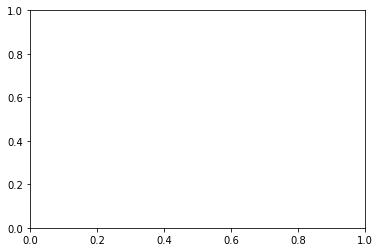

In [ ]:
import matplotlib.pyplot as plt
scorel =[]
for i in range(2,20,2):
    clf = RandomForestClassifier(n_estimators=500,max_depth=40, random_state=16, min_samples_split = i)
    clf = clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    score = f1_score(y_test, predictions, average='weighted')
    scorel.append(score)
print(max(scorel),'使分数最高的n_estimators值为：',scorel.index(max(scorel))*10+1)
plt.figure()
plt.plot(range(2,20,2),scorel)
plt.show()

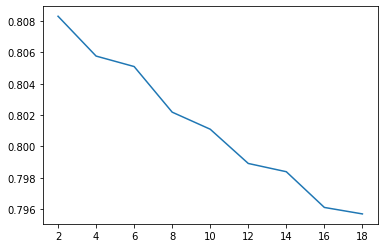

In [ ]:
plt.figure()
plt.plot(range(2,20,2),scorel)
plt.show()

**max_depth**

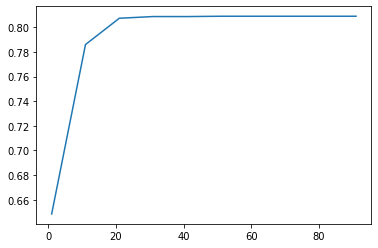

In [ ]:
plt.figure()
plt.plot(range(1,101,10),scorel)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
scorel =[]
for i in range(1,100,10):
    clf = RandomForestClassifier(n_estimators=500,max_depth=i, random_state=16)
    clf = clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    score = f1_score(y_test, predictions, average='weighted')
    scorel.append(score)
print(max(scorel),'使分数最高的n_estimators值为：',scorel.index(max(scorel))*10+1)
plt.figure()
plt.plot(range(1,201,10),scorel)
plt.show()

In [ ]:
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=9, min_samples_leaf=7, min_samples_split=2)
clf2 = MLPClassifier(hidden_layer_sizes=(12, 9), activation='tanh', max_iter=3000, solver='adam', random_state=42, learning_rate='constant', alpha=0.0001, batch_size=200, tol=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
clf3 = RandomForestClassifier(n_estimators=101, criterion='gini', oob_score=False, max_features='auto', max_depth=15, random_state=42, min_samples_leaf=2, min_samples_split=2)

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('mlp', clf3)], voting='soft', weights=[1, 2, 2], flatten_transform=True)

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=42)
score = cross_val_score(eclf1,X_train,y_train, cv=cv).mean()
print(score)

In [ ]:
X_train = train_df[['Label',"Text_Sim","Img_Sim","rouge","claim_length","document_length"]]
y_train = train_df["Category"]
X_test = val_df[['text_clip_label',"Text_Sim","Img_Sim","rouge","claim_length","document_length"]]
y_test = val_df["Category"]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- text_clip_label
Feature names seen at fit time, yet now missing:
- Label

  warnings.warn(message, FutureWarning)


In [ ]:
clf = RandomForestClassifier(n_estimators=500,max_depth=10, random_state=16)
clf = clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
score = f1_score(y_test, predictions, average='weighted')
print(score)

0.7536509873908309


In [ ]:
outputpath='/content/drive/MyDrive/factify2.0_doc/train_final.csv'
train_df.to_csv(outputpath,sep=',',index=True,header=True) 

In [ ]:
outputpath='/content/drive/MyDrive/factify2.0_doc/val_final.csv'
val_df.to_csv(outputpath,sep=',',index=True,header=True) 

In [ ]:
outputpath='/content/drive/MyDrive/factify2.0_doc/test_final.csv'
test_df.to_csv(outputpath,sep=',',index=True,header=True) 

In [ ]:
test_df.head(2)

,Unnamed: 0,Unnamed: 0.1,claim,claim_image,document,document_image,Claim OCR,Document OCR,Text_Sim,Img_Sim,text_clip_label,rouge,claim_length,document_length,Category,num
0,0,0,Delhi: Group of students protest outside offic...,http://pbs.twimg.com/media/EOJMHR4VUAALSeG.jpg...,Hundreds of Jamia Millia Islamia students prot...,http://pbs.twimg.com/media/EOJ4Q47UcAAq6wy.jpg...,ANI,NaN,0.712563,0.629404,1,0.615385,230,1778,Insufficient_Multimodal,2
1,1,1,"SpaceX's Crew Dragon capsule, its first spacec...",http://pbs.twimg.com/media/D0rEcWcX0AAe1x8.png...,The unmanned craft took about 27 hours to reac...,http://pbs.twimg.com/amplify_video_thumb/11017...,TONY GRAY NASA,abc\nNEWS,0.627955,0.525905,1,0.450000,161,2002,Insufficient_Text,3


In [ ]:
answer = test_df[["claim","claim_image","document","document_image","Claim OCR","Document OCR","Category"]]

In [ ]:
outputpath='/content/drive/MyDrive/factify2.0_doc/answer1.csv'
answer.to_csv(outputpath,sep=',',index=True,header=True) 